# Deep Learning

## Error in Sample

### Activity

1) Take MNIST dataset
2) Create a NN model
3) Take different values of n samples to train and test the model (i.e. 10, 100, 1000, 10000 etc.)
4) For those n random values test the model (without training the model) and save the error in sample
5) Repeat 60 time the step 3 and 4 and save the data for n in a list L_n
6) Create an histogram (KDE graph) for every L_n

The Goal of this activity is to understand how does the error behaves when we increment the number of samples, how most of the errors are acumulated in a same place

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [2]:
mnist = tf. keras.datasets.mnist #call to the dataset

In [3]:
#Returns Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

(x_train,y_train), (x_test, y_test) = mnist.load_data() #split the dataset

#load.data() returns 2 tuples

In [4]:
print(f"The shape of x_train: {x_train.shape}")
print(f"The shape of y_train: {y_train.shape} \n")

print(f"The shape of x_test: {x_test.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of x_train: (60000, 28, 28)
The shape of y_train: (60000,) 

The shape of x_test: (10000, 28, 28)
The shape of y_test: (10000,)


In [5]:
#normalize the data

x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)

In [6]:
#definition of the model 1

model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=(28,28))) #Flatten each input of 32*32*3 as a simple vector
model1.add(tf.keras.layers.Dense(15, activation = "relu"))
model1.add(tf.keras.layers.Dense(10, activation = "softmax"))
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

model1.save("model1")

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [10]:
#model_name should be a string

#num_data: number of sample i will taka from training
#iterations: number of times I will repeat the experiment per n value

def model_test(x_train, y_train, num_data, model_name):
    #Load the model
    loaded_model1 = tf.keras.models.load_model(model_name)

    all_hist = [] #here i will save all histograms, every x here is one histogram
    iterations = 60

    for n in num_data:
        histogram_values=[] #Here i will save one hisogram for specific n       
            
        for j in range(iterations):
            #Select n random indices from 0 to x_train.shape[0] 
            indices = np.random.choice(x_train.shape[0], n, replace=False)

            # Use these indices to create a new array such that only have the selected samples from the entire dataset
            x_train_df = x_train[indices] #This is the data I will use to train the model
            y_train_df = y_train[indices] #This are the classes of the selected samples

            #Here I don't want to train the model, just test it in the basic model without trainning
            loss_in , acuracy_in = loaded_model1.evaluate(x_train_df,y_train_df) #check in sample error

            histogram_values.append(loss_in)
        
        all_hist.append(histogram_values)
    
    return all_hist

In [8]:
print(x_train.shape)

(60000, 28, 28)


In [33]:
num_data= [10,100,1000,10000]

results = model_test(x_train, y_train, num_data, "model1")


313/313 [==============================] - 0s 1ms/step - loss: 2.3079 - accuracy: 0.0202


In [35]:
results = np.asarray(results)
print(results.shape)

(4, 60)


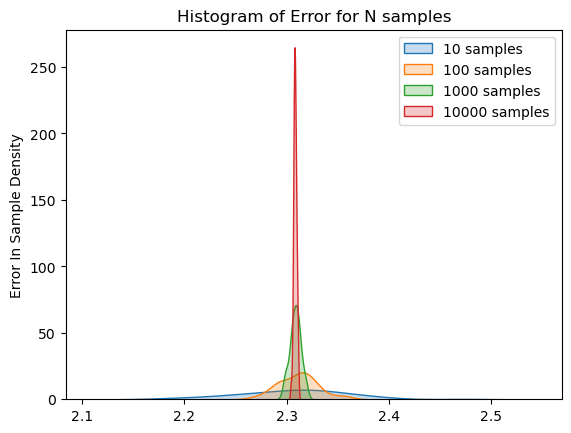

In [36]:
#Kernel Density Estimate (KDE)

#KDE is analogous to histogram to find the probability density of the data
import seaborn as sns

#Create a Figure

plt.figure()
plt.ylabel('Error In Sample Density')
plt.title(f'Histogram of Error for N samples')



# Loop over data and create a histogram for each row
for i in range(results.shape[0]):
    sns.kdeplot(results[i], fill=True, label= f'{num_data[i]} samples')

plt.legend()

plt.show()